<strong><font color=darkblue size=6>HW12, Nov-29</font></strong>

1. **Kaggle public LB rank & score**: 10 & 0.15240 
1. **Kaggle team name**: DB-Max Verstappen Fun Club-Mozharov,Korzun,Veips,Poletaev 
  1. Use format: `[ProGroup ID]-[Your fancy Kaggle group name]-[Team member names]`. 
  1. Eg. `DA-Dota-Lazareva,Iazykova,Ovyan` (see Rules in Kaggle for ProGroup ID)
1. Our Colab uses [GPU]

Your private LB score must be reproducible with this Colab. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation). Don't exceed runtime.

<hr color=darkblue>

<strong><font color=darkblue size=6>Task 1: Theory (DSBA/ICEF only)</font></strong>

[LaTeX macros]
$%
    \newcommand{\R}{\mathbb R}%
    \newcommand{\pr}[1]{\left(#1\right)}%
    \newcommand{\given}{~\middle|~}%
    \newcommand{\prc}[2]{\pr{#1 \given #2}}%
    \DeclareMathOperator{\GammaDistr}{Gamma}%
    \DeclareMathOperator{\AIC}{AIC}%
    \DeclareMathOperator{\BIC}{BIC}%
    \newcommand{\oo}{\infty}%
    \newcommand{\ooL}{{-\oo}}%
    \newcommand{\ooR}{{+\oo}}%
    \newcommand{\diff}{\mathrm d}%
    \newcommand{\Diff}{\,\diff}%
    \newcommand{\partder}[2][{}]{\frac{\partial^{#1}}{\partial #2^{#1}}}%
    \newcommand{\I}{\mathcal I}%
$

## **Task 1.1**

Indicate whether the following statements are true or false. Justify your answers.

i. Other things equal, a machine learning model trained on more training observation is less likely to overfit.

ii.  Compared with AIC, BIC tends to select a larger model size when the sample size $n$ becomes sufficiently large.

iii. Explain the assumptions made in each of the following resampling methods in forecasting the daily [TSLA](https://you.com/search?q=tesla+stock) closing stock price based on stock's [OHLC](https://en.wikipedia.org/wiki/Open-high-low-close_chart).
1. [`sklearn.model_selection.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)
1. [`sklearn.model_selection.TimeSeriesSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html)


## **SOLUTION**

### Part i
This is true. A machine learning model represents a family of functions used for making predictions with the function to be used being chosen at the training step. For example, the linear regression model represents the family of linear functions of input, $\hat y_i(X_i) = b + \mathbf{w} · X_i$, where $b \in \R$, $\mathbf{w} \in \R^p$ are parameters, and $X_i \in \R^p$.

If wa are given a set of data points $(X_i, y_i)$, a machine learning model would probably try to find a function that passes close to these data points out of the function family the model represents. However, highly flexible machine learning models, such as decision trees or variants of neural networks, have very different kinds of these predictive functions in their function families, so there are usually many functions which pass close to the given data points, but may diverge significantly in their values in other data points.

Consider the model on the training step choosing a function out of its function family. By adding more data points the chosen function should pass close to, we are removing from consideration (or at least penalizing) functions that do not. Since we fundamentally want to choose a function that models the underlying data point distribution most closely, adding new points increases our odds to do so, as we have probably dismissed much more functions that pass far away from this distribution than those passing close to it.

Hence (other things equal), the more data points we have, the greater is the proportion of functions that model the distribution reasonably well among all functions that the model can plausibly choose with varying but plausible values of random noise in observations. The greater is this proportion, the greater is the chance that training the model would yield a fair approximation of the data distribution and the less likely is overfitting.

### Part ii
This is probably false.
For a model with $k$ parameters fit by the maximum likelihood estimation method (the set of such models includes the models fit by least squares) using $n$ training observations, AIC and BIC are defined as follows:
$$\AIC = 2k - 2\log L^* \qquad \BIC = k\log n - 2\log L^*$$
where $L^*$ is the maximized value of the likelihood (source: Wikipedia [[AIC]](https://en.wikipedia.org/wiki/Akaike_information_criterion#Definition) [[BIC]](https://en.wikipedia.org/wiki/Bayesian_information_criterion#Definition)). The latter is not very important for us, since the term with $L^*$ is the same both in AIC and in BIC, but what is different in these metrics is the first term: $2k$ in AIC, and $k\log n$ in BIC.

Lower values of AIC and BIC indicate better models. When $n \to \oo$, $\log n \to \oo$ as well, which means that, when optimizing BIC, the cost of each additional parameter becomes quite high in comparison with AIC, where it is 2 regardless of $n$. Hence, it is quite likely that BIC would favor a smaller value of $k$ than AIC for large $n$, which corresponds to smaller models, and not larger ones, as suggested in the statement.

### Part iii
`KFold` assumes the order of observations and the relative order of training/testing observations do not affect the result of the model. When splitting into folds and assigning folds to either training or testing observations, it can freely put a training observation before (chronologically) a testing observation or vice versa.

With shuffling enabled, `KFold` evaluates the model on the interpolation task,
when it has to predict the closing price of the TSLA stock on a certain day with it almost always knowing closing prices within days from this moment (that is, a testing observation is usually surrounded by training observations).

With shuffling disabled, `KFold` evaluates how well the model can fill in the omitted interval from the price dynamics given the past and the future.

Both tasks are anything but forecasting.

`TimeSeriesSplits` assumes that the data points are ordered by time, and the goal is to predict the future given the past. Another assumption is that the train/test indices returned must be continuous ranges with respect to the dataset provided (with an optional gap between train/test ranges). It means that `TimeSeriesSplit` is free to choose whatever continuous time ranges for training and testing, but all test observations must come chronologically after all training observations.

## **Task 1.2**

Given  [iid](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) random variables $X_1,...,X_n$, each of the form $X\sim f(\theta)$ with [PDF](https://en.wikipedia.org/wiki/Probability_density_function):

$$f\left(X \mid \theta\right)=\frac{\theta X}{ e ^{0.5 X^{2} \theta}}, $$

where $ \quad X > 0 , \quad \theta>0.$

(a) Assign the Gamma($\alpha$, $\beta$) prior on $\theta$, for $\alpha$, $\beta$ > 0 and derive the corresponding [posterior PDF](https://en.wikipedia.org/wiki/Posterior_probability).

(b) Derive the [Jeffreys prior](https://en.wikipedia.org/wiki/Jeffreys_prior) for $\theta$. Use it to obtain the corresponding posterior distribution.

## **SOLUTION**

### Part (a)
Let $g(\theta)$ be the prior PDF of $\theta$. Then
$$g(\theta) = \frac{\beta^\alpha}{\Gamma(\alpha)} \gamma(\alpha, \beta\theta)$$
since $\theta \sim \GammaDistr(\alpha, \beta)$.

Denote the posterior PDF of $\theta$ as $g\prc{\theta}X$. From the Bayes Theorem, we obtain
$$g\prc{\theta}X = \frac{f\prc{X}\theta · g(\theta)}{f(X)}$$
where $f(X)$ can be regarded as a scaling factor independent of $\theta$.
By substituting PDF definitions, we obtain
$$g\prc{\theta}X = \frac{\theta X}{\exp\pr{\frac12 X^2\theta}} · \frac{\beta^\alpha}{\Gamma(\alpha)} \gamma(\alpha, \beta\theta) · \frac1{f(X)}$$
We have found the posterior PDF modulo the scaling factor $\frac1{f(X)}$. To find the latter, use the constraint:
$$
    \int_0^\ooR
        \frac{\theta X}{\exp\pr{\frac12 X^2\theta}}
        · \frac{\beta^\alpha}{\Gamma(\alpha)} \gamma(\alpha, \beta\theta)
        · \frac1{f(X)}
    \Diff \theta = 1
$$

Rewrite by moving the constant terms outside of the integral:
$$
    \frac{\beta^\alpha X}{\Gamma(\alpha)f(X)} \int_0^\ooR
        \frac{\theta \gamma(\alpha, \beta\theta)}{\exp\pr{\frac12 X^2\theta}}
    \Diff \theta = 1
$$
Unfortunately, we have no idea how to find this integral and finalize the calculations of the posterior. What we have found this far is:
$$g\prc{\theta}X \propto \frac{\theta X}{\exp\pr{\frac12 X^2\theta}} · \frac{\beta^\alpha}{\Gamma(\alpha)} \gamma(\alpha, \beta\theta)$$

### Part (b)
Denote the Jeffreys prior as $p(\theta)$. Then:
$$p(\theta) = c · \sqrt{\I(\theta)}$$
where $c$ is a normalizing factor and $\I(\theta)$ is the Fisher information of $\theta$. Expand the latter:
$$p(\theta) = c · \sqrt{
    -\int_0^\ooR
        \pr{\partder[2]\theta \log f\prc{X}\theta}
    f\prc{X}\theta \Diff X
}$$

Substitute the value for $f\prc{X}\theta$:
$$p(\theta) = c · \sqrt{
    -\int_0^\ooR \pr{
        \partder[2]\theta \log \frac{X\theta}{\exp\pr{\frac12 X^2\theta}}
    } \frac{X\theta}{\exp\pr{\frac12 X^2\theta}} \Diff X
}$$

Expand the logarithm:
$$p(\theta) = c · \sqrt{
    -\int_0^\ooR \pr{
        \partder[2]\theta \pr{\log X + \log \theta - \frac12 X^2\theta}
    } \frac{X\theta}{\exp\pr{\frac12 X^2\theta}} \Diff X
}$$

Take the first partial derivative of the parenthesized subexpression:
$$p(\theta) = c · \sqrt{
    -\int_0^\ooR \pr{
        \partder\theta \pr{
            \frac1\theta - \frac12 X^2
        }
    } \frac{X\theta}{\exp\pr{\frac12 X^2\theta}} \Diff X
}$$

Take the second partial derivative of the parenthesized subexpression:
$$p(\theta) = c · \sqrt{
    \int_0^\ooR \frac1{\theta^2}
    · \frac{X\theta}{\exp\pr{\frac12 X^2\theta}} \Diff X
}$$

Move $\frac1{\theta^2}$ out of the integral and the radical:
$$p(\theta) = \frac c\theta · \sqrt{
    \int_0^\ooR \frac{X\theta}{\exp\pr{\frac12 X^2\theta}} \Diff X
}$$

Apply the definition of $f\prc{X}\theta$:
$$p(\theta) = \frac c\theta · \sqrt{
    \int_0^\ooR f\prc{X}\theta \Diff X
}$$

$f\prc{X}\theta$ integrates to 1:
$$p(\theta) = \frac c\theta · \sqrt1 = \frac c\theta$$

Such $c$, however, does not exist, since $\int_0^\ooR \frac c\theta \Diff\theta$ diverges, but it only means that we have an improper prior, which shouldn't affect the derived posterior.

Find the posterior:
$$p\prc{\theta}X = k' · f\prc{X}\theta · p(\theta)
    = k · \frac{X}{\exp\pr{\frac12 X^2\theta}}$$
where $k$, $k'$ are normalizing factors.

The posterior should integrate to 1:
$$\begin{split}
    \int_0^\ooR p\prc{\theta}X \Diff X
    &= k\int_0^\ooR \frac{X}{\exp\pr{\frac12 X^2\theta}} \Diff X \\
    &= \frac k\theta \int_0^\ooR \frac{X\theta}{\exp\pr{\frac12 X^2\theta}} \Diff X \\
    &= \frac k\theta \int_0^\ooR f\prc{X}\theta \Diff X \\
    &= \frac k\theta \\
\end{split}$$

Hence, $k := \theta$, and the final expression of the posterior is:
$$p\prc{\theta}X = \frac{\theta X}{\exp\pr{\frac12 X^2\theta}}$$

<hr color=darkblue>

<font color=darkblue size=6>📈<strong>Task 2: Kaggle-Crypto (for DSBA/ICEF/OOC)</strong></font>


<details><summary><font color=darkblue>▶ More info and Kaggle API instructions</font></summary>

**Private URL** for students (allows submission) is in Moodle's HW assignment. **Public URL** with read-only access is [here](https://www.kaggle.com/c/hse-ml-hw12-nov-29-crypto/rules). See competition rules, submission, grading, dataset, and performance metric. The **starter code** below produces a baseline model, which you should beat, while respecting the competition rules. Your code starts after the timer. This is your baseline model. Remember to seed [RNG](https://en.wikipedia.org/wiki/Random_number_generation) in all experiments for reproducibility.

**Instructions for enabling Kaggle API in Colab**:
1. Accept competition rules before running [Kaggle API](https://github.com/Kaggle/kaggle-api#api-credentials). [Loading Kaggle dataset example](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab)
1. In your Kaggle Account, [Create API Token](https://github.com/Kaggle/kaggle-api#api-credentials) and save the resulting **kaggle.json** file to the [root of your Google Drive](https://drive.google.com/drive/u/0/my-drive) 
2. In Colab, open **Files** panel 🗀 (on the left) and click gray folder icon <font color=gray>🖿</font> to mount your Google drive

Your Kaggle/Google Drive credentials are secure; and Colab's kaggle.json only lasts a Colab session.
</details>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install --upgrade --force-reinstall --no-deps kaggle > log  # upgrade kaggle package (to avoid a warning)
!mkdir -p ~/.kaggle                                           # .kaggle folder must contain kaggle.json for kaggle executable to properly authenticate you to Kaggle.com
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log  # First, download kaggle.json from kaggle.com (in Account page) and place it in the root of mounted Google Drive
!cp kaggle.json ~/.kaggle/kaggle.json > log                   # Alternative location of kaggle.json (without a connection to Google Drive)
!chmod 600 ~/.kaggle/kaggle.json                              # give only the owner full read/write access to kaggle.json
!kaggle config set -n competition -v hse-ml-hw12-nov-29-crypto  # set the competition context for the next few kaggle API calls. !kaggle config view - shows current settings
!kaggle competitions download >> log                          # download competition dataset as a zip file
!unzip -o *.zip >> log                                        # Kaggle dataset is copied as a single file and needs to be unzipped.
!kaggle competitions leaderboard --show                       # print public leaderboard

cp: cannot stat 'kaggle.json': No such file or directory
- competition is now set to: hse-ml-hw12-nov-29-crypto
Using competition: hse-ml-hw12-nov-29-crypto
 teamId  teamName                                                   submissionDate       score    
-------  ---------------------------------------------------------  -------------------  -------  
7855357  IB-Black Swans-Adshead,Ivanushkina,Lukianov                2021-12-12 16:14:06  0.70757  
7852868  Argunov Vlad                                               2021-12-12 18:27:10  0.37670  
7845693  Dmitry Ignatev                                             2021-12-12 12:51:25  0.37468  
7868551  Kseniya Yakunina                                           2021-12-12 19:18:05  0.16284  
7876052  rageesteem                                                 2021-12-12 19:23:55  0.15841  
7874618  Ushakov Stanislav                                          2021-12-12 16:20:02  0.15833  
7872453  DQ-3D-Dzhkha,Dryagin,Bashminova           

See [more](https://nvidia.custhelp.com/app/answers/detail/a_id/3751/~/useful-nvidia-smi-queries) about NVIDIA GPU stats. Test your code in (free) Colab. It uses Tesla K80 GPU.

In [ ]:
!nvidia-smi --query-gpu=gpu_name,memory.total,memory.free,memory.used --format=csv

name, memory.total [MiB], memory.free [MiB], memory.used [MiB]
Tesla P100-PCIE-16GB, 16280 MiB, 16280 MiB, 0 MiB


In [ ]:
!pip -q install -U tensorflow_addons > log   # update tfa in case students need to use it

In [ ]:
%%time
%%capture
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all" 
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, os
os.environ['TF_DETERMINISTIC_OPS'] = '1'  # We load it before tf. Still useless?  https://github.com/tensorflow/tensorflow/issues/38197
import tensorflow_addons as tfa, tensorflow as tf, tensorflow.keras as keras, tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, RNN, LSTM, TimeDistributed
ToCSV = lambda df, fname: df.round(2).to_csv(f'{fname}.csv', index_label='id') # rounds values to 2 decimals

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60*5): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

np.set_printoptions(linewidth=100, precision=2, edgeitems=5, suppress=True)
pd.set_option('max_columns', 20, 'precision', 2, 'display.max_rows', 4)

CPU times: user 2.22 s, sys: 363 ms, total: 2.58 s
Wall time: 2.59 s


Your training data are 7 descriptive features for past 500K observations. See helpful [Tutorial to the G-Research Crypto Competition](https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition).

In [ ]:
tXY = pd.read_csv('tXY.csv', index_col='id'); tXY

,Count,Open,High,Low,Close,Volume,VWAP
id,,,,,,,
0,64,0.20,0.20,0.20,0.20,447,0.20
1,72,0.20,0.20,0.20,0.20,592,0.20
...,...,...,...,...,...,...,...
499998,1636,1.15,1.16,1.15,1.15,2615,1.15
499999,3228,1.13,1.14,1.12,1.13,3354,1.13


Your task is to forecast the closing price for all future time steps (index IDs below).

In [ ]:
pY = pd.read_csv('sampleSubmission.csv', index_col='id'); pY.T

id,500000,500001,500002,500003,500004,500005,500006,500007,500008,500009,...,524421,524422,524423,524424,524425,524426,524427,524428,524429,524430
Close,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tmr = Timer() # runtime limit (in seconds). Add all of your code after the timer

⏳ started. You have 300 sec. Good luck!


<font size=5>⏳</font> <strong><font color=orange size=5>Your Code, Documentation, Ideas and Timer Start Here...</font></strong>


**TODO. Explain your preprocessing:** i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.

**TODO. Explain your modeling approach:** ideas you tried and why you thought they would be helpful. Takeaway: how these decisions guided you in modeling.

This is your baseline DNN model. Remember to [seed all your experiments](https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development) for reproducibility. [Status of GPU-Determinism in TF](https://github.com/NVIDIA/framework-determinism/blob/master/tensorflow_status.md). 

In [ ]:
tXY

,Count,Open,High,Low,Close,Volume,VWAP
id,,,,,,,
0,64,0.20,0.20,0.20,0.20,447,0.20
1,72,0.20,0.20,0.20,0.20,592,0.20
...,...,...,...,...,...,...,...
499998,1636,1.15,1.16,1.15,1.15,2615,1.15
499999,3228,1.13,1.14,1.12,1.13,3354,1.13


In [ ]:
tXY['Volume/Count'] = tXY['Volume'] / tXY['Count']
# tXY['diff_Close-Open'] = tXY['Close'] - tXY['Open']
# tXY['logLow'] = np.log(tXY['Low'])
# tXY['logHigh'] = np.log(tXY['High'])

taX.shape=(K,Nx,p)=(50, 20000, 8); taY=(K,Ny)=(50, 24431)


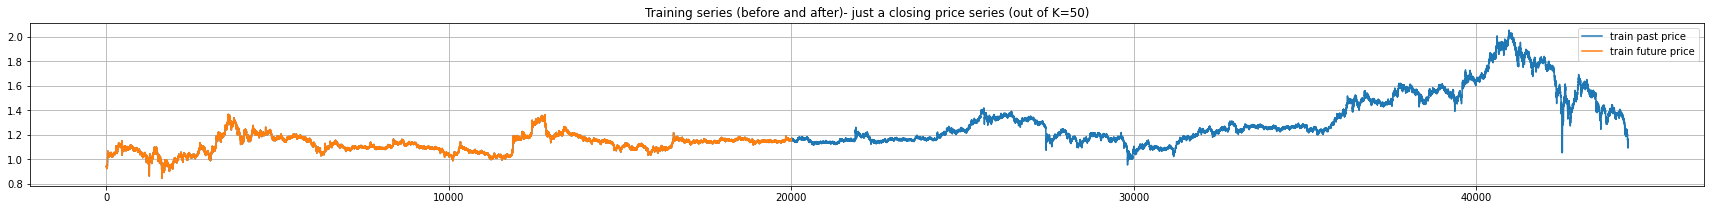

In [ ]:
K, (N, p), Nx, Ny = 50, tXY.shape, 20000, len(pY)  # samples, dataset dim, train set size, forecast set size
LtX, LtY = [], []
for i in range(N-Ny-K, N-Ny):                     # populate K samples with past X series and future Y series
  LtX.append(tXY.iloc[(i-Nx):i, :].values)        # X: historical 7Dim observations for Nx steps behind
  LtY.append(tXY.loc[i:(i+Ny-1),'Close'].values)  # Y: future closing prices for Ny steps ahead
taX, taY = np.array(LtX), np.array(LtY)           # training arrays past input X and future output Y
print(f'taX.shape=(K,Nx,p)={taX.shape}; taY=(K,Ny)={taY.shape}')  # convert to 3-tensors

df = pd.DataFrame(np.r_[taX[0,:,4], taY[0,:]], columns=['train past price'])
ax = df.plot(figsize=(30,3), title=f'Training series (before and after)- just a closing price series (out of K={K})');
pd.DataFrame(taX[0,:,4], columns=['train future price']).plot(grid=True, ax=ax);

Build an LSTM model with two hidden layers. It splits $K$ samples into batches with 7D series $X_{N_x\times p}$ as input and 1D series $Y_{N_y\times 1}$ as output.


In [ ]:
%%time
tf.random.set_seed(0)   # always seed your experiments
Init = keras.initializers.GlorotUniform(seed=0) # seed all that you can

m = Sequential(
  [LSTM(100, return_sequences=True, input_shape=[None, p], name='LSTM1', kernel_initializer=Init, recurrent_initializer=Init), 
  Dropout(.2, name='d1'),
  LSTM(75, name='LSTM2', return_sequences=True, kernel_initializer=Init, recurrent_initializer=Init),
  Dropout(.2, name='d2'),
  LSTM(75, name='LSTM3', kernel_initializer=Init, recurrent_initializer=Init),
  Dropout(.2, name='d3'), 
  Dense(Ny, name='out', kernel_initializer=Init) ], name='RNN_model') # we build Ny forecasts
m.summary()
m.compile(optimizer='adam', loss='mean_squared_error')
hist = m.fit(taX, taY, epochs=20, batch_size=32)

Model: "RNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, None, 100)         43600     
                                                                 
 d1 (Dropout)                (None, None, 100)         0         
                                                                 
 LSTM2 (LSTM)                (None, None, 75)          52800     
                                                                 
 d2 (Dropout)                (None, None, 75)          0         
                                                                 
 LSTM3 (LSTM)                (None, 75)                45300     
                                                                 
 d3 (Dropout)                (None, 75)                0         
                                                                 
 out (Dense)                 (None, 24431)             18

The plot below: the model memorized the prices from recent history (plus some local noise). Still you can use these predictions to visually (i.e. qualitatively) determine whether predictions are meaningful (i.e. have price-like shape) or just noise.

tX_recent.shape=(Nx,p)=(20000, 8)


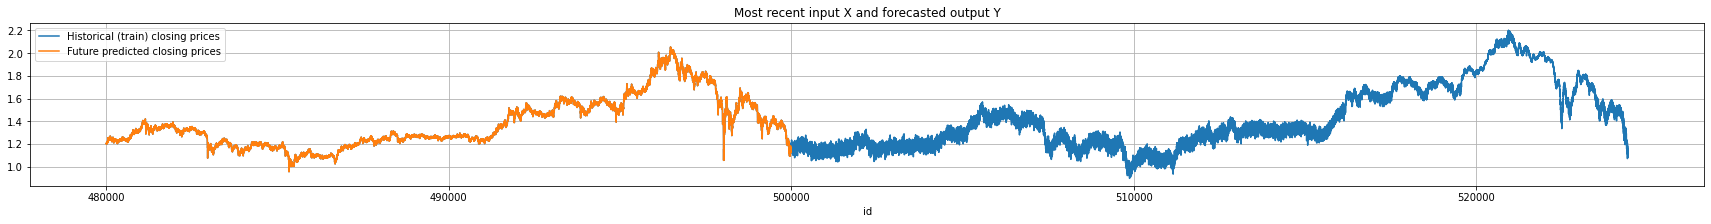

In [ ]:
tX_recent = tXY.iloc[-Nx:,:]  # most recent history of the coin
print(f'tX_recent.shape=(Nx,p)={tX_recent.shape}')
pY['Close'] = m.predict(tX_recent.values[np.newaxis,...]).flatten()  # the model expects a 3-tensor (K=1,Nx,p)
ax = pd.concat([tX_recent.Close, pY.Close]).plot(figsize=(30,3), title='Most recent input X and forecasted output Y');
tX_recent.Close.plot(ax=ax, grid=True);
ax.legend(["Historical (train) closing prices", "Future predicted closing prices"]);

1. The model generates a baseline submission CSV file, see Colab folder (🗀 on the left). 
1. You can download the generated CSV file and submit it to Kaggle.

In [ ]:
ToCSV(pY, 'Crypto-baseline')

<font size=5>⏳</font> <strong><font color=orange size=5>Do not exceed competition's runtime limit!</font></strong>


In [ ]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

Runtime is 104 sec


# 💡**Starter Ideas**

1. Try different RNN architectures and hyperparameters
1. Try [correlation loss/metric](https://duckduckgo.com/?q=correlation+loss+in+tensorflow&ia=web) (or equivalent)
1. Try longer/shorter history. FYI: GPU may not fit all observations, but you could lower the precision or simplify DNN
1. Try forecasting returns (differences or log differences at different lags) instead of actual values. Returns might appear "more" stationary (You'll need to compute forecasted prices from forecasted returns later)
1. Try new features: differences, fractions, powers of existing features, lagged features or lagged differences,..
1. Try a different time scale. Eg. forecasting every $k$ steps and then imputing interim values
1. Try technique in HOML pp.509-510
1. Try (programmatically) assigning higher/lower weights to history or historical events (such as extreme events)
1. Check [Kaggle G-Research Crypto Forecasting](https://www.kaggle.com/c/g-research-crypto-forecasting/code) competition for more suitable ideas.
1. Try further smoothing/averaging and forecasting values at sparser intervals
1. Try forecasting just the future trend